# Qualité de l'eau en région PACA

In [1]:
import numpy
import seaborn 
import pandas
import matplotlib.pyplot as plt
import datetime
from scipy.optimize import curve_fit
seaborn.set()

In [2]:
data = pandas.read_csv("ind_sudpaca_agglo.csv")
data

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur
0,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c1,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6029,Cannes-Grasse-Antibes,3,0,4,2,0,#8DA71E
1,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23c0,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,6088,Nice,4,0,3,3,0,#8DA71E
2,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bf,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13001,Aix-en-Provence,2,0,3,2,0,#8DA71E
3,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,2,0,3,3,0,#8DA71E
4,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bd,01-01-2018 00:00:00,4,Bon,AtmoSud,commune,83137,Toulon,1,0,4,2,0,#8DA71E
5,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bc,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,84007,Avignon,2,0,3,2,0,#8DA71E
6,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23bb,01-01-2019 00:00:00,4,Bon,AtmoSud,commune,6029,Cannes-Grasse-Antibes,3,0,3,4,0,#8DA71E
7,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ba,01-01-2019 00:00:00,4,Bon,AtmoSud,commune,6088,Nice,3,0,3,4,0,#8DA71E
8,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b9,01-01-2019 00:00:00,4,Bon,AtmoSud,commune,13001,Aix-en-Provence,2,0,3,4,0,#8DA71E
9,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8,01-01-2019 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,3,0,2,4,0,#8DA71E


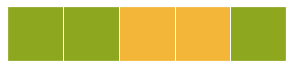

In [3]:
seaborn.palplot(seaborn.color_palette(data.tail()["couleur"]))

In [172]:
donnees_Marseille = data.loc[data['lib_zone']=="Marseille"]
donnees_Marseille

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur
3,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be,01-01-2018 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,2,0,3,3,0,#8DA71E
9,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8,01-01-2019 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,3,0,2,4,0,#8DA71E
15,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2,01-02-2018 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,3,0,2,3,0,#8DA71E
21,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac,01-02-2019 00:00:00,3,Bon,AtmoSud,commune,13055,Marseille,3,0,3,3,0,#8DA71E
27,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a6,01-03-2018 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,1,0,4,3,0,#8DA71E
33,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a0,01-03-2019 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,2,0,4,3,0,#8DA71E
39,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-239a,01-04-2018 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,3,0,4,2,0,#8DA71E
45,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2394,01-04-2019 00:00:00,5,Moyen,AtmoSud,commune,13055,Marseille,3,0,5,4,0,#F4B638
51,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-238e,01-05-2018 00:00:00,4,Bon,AtmoSud,commune,13055,Marseille,3,0,4,3,0,#8DA71E
57,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2388,01-05-2019 00:00:00,5,Moyen,AtmoSud,commune,13055,Marseille,3,0,5,3,0,#F4B638


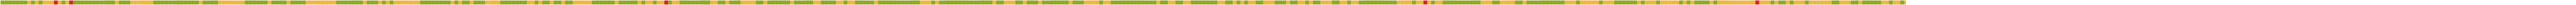

In [15]:
seaborn.palplot(seaborn.color_palette(donnees_Marseille["couleur"]))

In [76]:
villes = data.groupby('lib_zone').mean()[["valeur"]]
villes

,valeur
lib_zone,
Aix-en-Provence,4.554074
Avignon,4.514074
Cannes-Grasse-Antibes,4.364444
Marseille,4.453333
Nice,4.499259
Toulon,4.508148


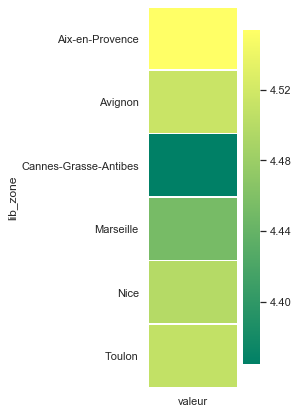

In [67]:
f, ax = plt.subplots(figsize=(2, 7))
seaborn.heatmap(villes, fmt="d", cmap= 'summer', linewidths=.5, ax=ax)

In [82]:
mars = donnees_Marseille["valeur"]

Text(0, 0.5, 'nb de releves')

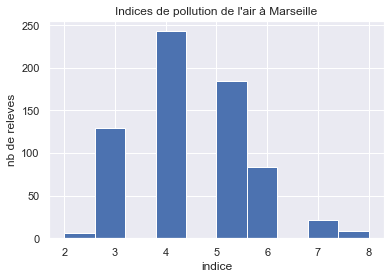

In [88]:
mars.hist()
plt.title("Indices de pollution de l'air à Marseille")
plt.xlabel("indice")
plt.ylabel("nb de releves")

In [95]:
mars2 = donnees_Marseille.groupby("valeur").count()["qualif"]# toutes les colonnes donnent le même nombre, on prend qualif par exemple
mars2

valeur
2      6
3    129
4    243
5    184
6     84
7     21
8      8
Name: qualif, dtype: int64

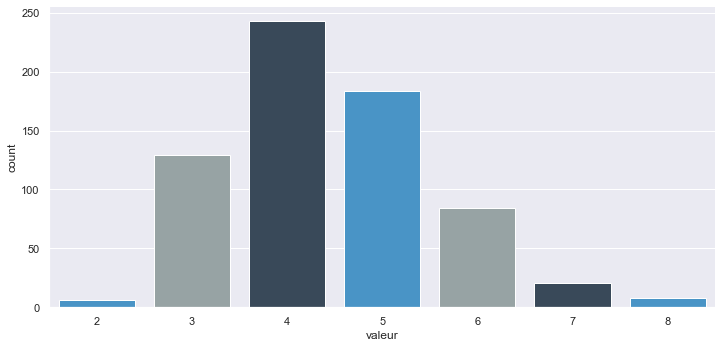

In [116]:
seaborn.catplot("valeur", data=donnees_Marseille, aspect=2,kind="count", palette=["#3498db", "#95a5a6", "#34495e"])

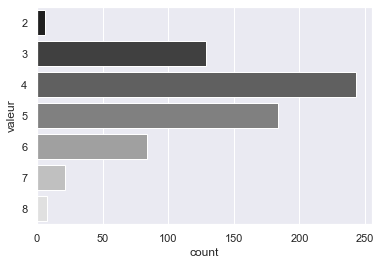

In [119]:
seaborn.countplot(y="valeur", data=donnees_Marseille,  palette="gray")

In [174]:
donnees_Marseille['date_ech'] = [datetime.datetime.strptime(str(d), "%d-%m-%Y %H:%M:%S").date() for d in donnees_Marseille['date_ech']]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [175]:
donnees_Marseille

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,couleur
3,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23be,2018-01-01,3,Bon,AtmoSud,commune,13055,Marseille,2,0,3,3,0,#8DA71E
9,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b8,2019-01-01,4,Bon,AtmoSud,commune,13055,Marseille,3,0,2,4,0,#8DA71E
15,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23b2,2018-02-01,3,Bon,AtmoSud,commune,13055,Marseille,3,0,2,3,0,#8DA71E
21,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23ac,2019-02-01,3,Bon,AtmoSud,commune,13055,Marseille,3,0,3,3,0,#8DA71E
27,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a6,2018-03-01,4,Bon,AtmoSud,commune,13055,Marseille,1,0,4,3,0,#8DA71E
33,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-23a0,2019-03-01,4,Bon,AtmoSud,commune,13055,Marseille,2,0,4,3,0,#8DA71E
39,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-239a,2018-04-01,4,Bon,AtmoSud,commune,13055,Marseille,3,0,4,2,0,#8DA71E
45,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2394,2019-04-01,5,Moyen,AtmoSud,commune,13055,Marseille,3,0,5,4,0,#F4B638
51,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-238e,2018-05-01,4,Bon,AtmoSud,commune,13055,Marseille,3,0,4,3,0,#8DA71E
57,ind_sudpaca_agglo.fid--48cd4d03_16e677a716d_-2388,2019-05-01,5,Moyen,AtmoSud,commune,13055,Marseille,3,0,5,3,0,#F4B638


In [177]:
donnees = donnees_Marseille[["date_ech", "valeur"]].sort_values(by="date_ech")
donnees

,date_ech,valeur
3,2018-01-01,3
141,2018-01-02,3
279,2018-01-03,4
417,2018-01-04,3
555,2018-01-05,4
693,2018-01-06,4
831,2018-01-07,5
969,2018-01-08,5
1107,2018-01-09,4
1245,2018-01-10,5


(736695.0, 737378.0)

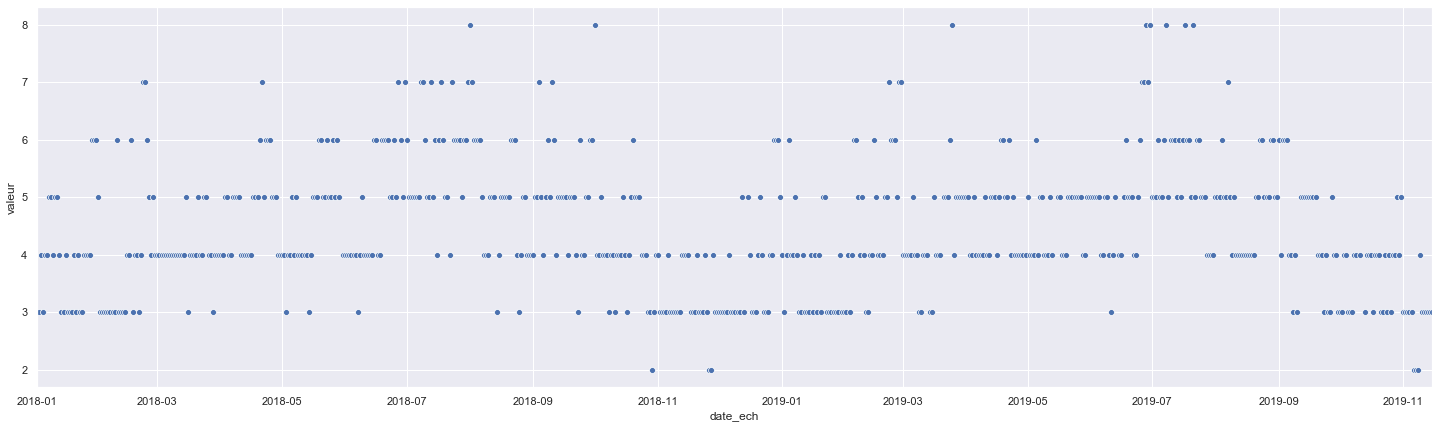

In [206]:
f, ax = plt.subplots(figsize=(25, 7))
seaborn.scatterplot(donnees["date_ech"], donnees["valeur"], ax=ax)
ax.set_xlim(["2018-01-01","2019-11-15"])# on impose les bornes de l'affichage

In [210]:
donneesJuillet = donnees.loc[::30]
donneesJuillet

,date_ech,valeur
3,2018-01-01,3
3975,2018-01-31,5
165,2018-03-02,4
39,2018-04-01,4
51,2018-05-01,4
63,2018-06-01,4
75,2018-07-01,6
4011,2018-07-31,7
3927,2018-08-30,4
3825,2018-09-29,6


(736695.0, 737364.0)

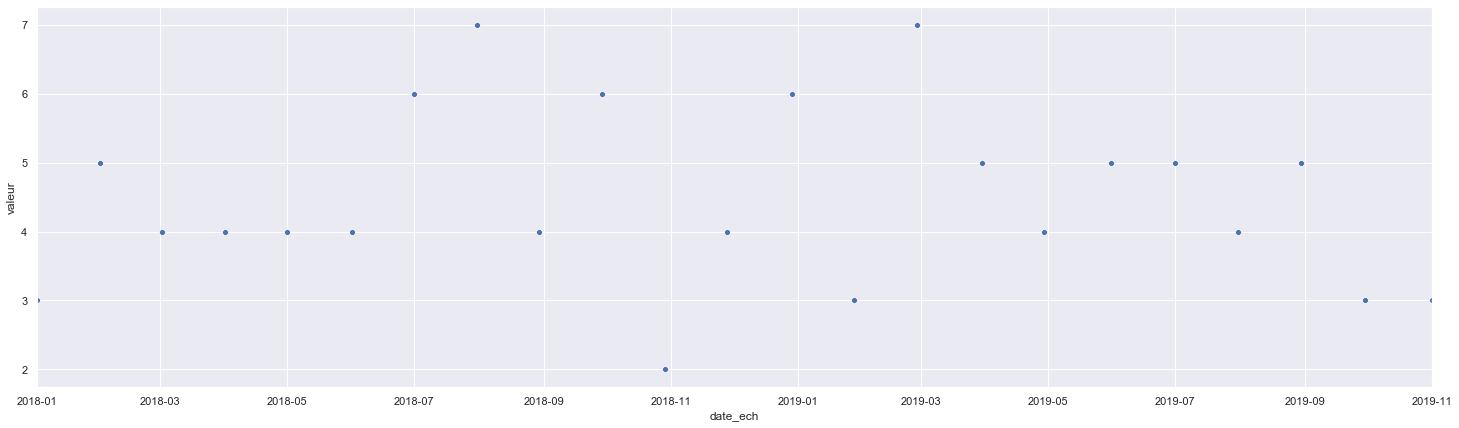

In [214]:
f, ax = plt.subplots(figsize=(25, 7))
seaborn.scatterplot(donneesJuillet["date_ech"], donneesJuillet["valeur"], ax=ax)
ax.set_xlim(["2018-01-01","2019-11-01"])

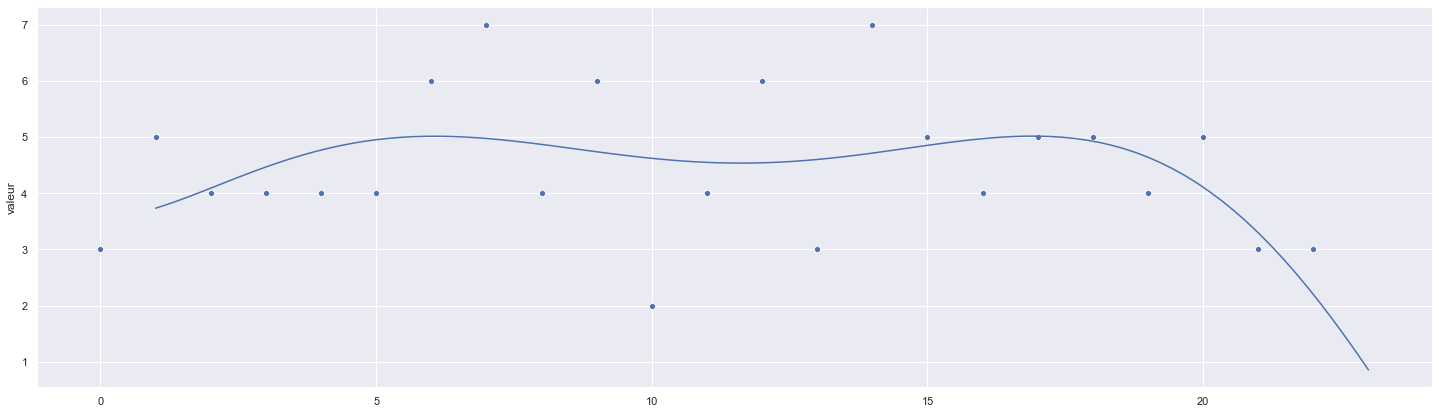

In [249]:
def f(x, a, b, c, d, e, f, g, h):
    return a*(x**7) + b*(x**6) + c*(x**5) + d*(x**4) + e*(x**3) + f*(x**2) + g*x + h

X = [i for i in range(len(donneesJuillet))]
approx, cov = curve_fit(f, X, donneesJuillet["valeur"]) 
X2 = numpy.linspace(1, len(donneesJuillet), 100)

[a, b, c, d, e, f, g, h] = approx
def courbeTendance(x):
    return a*(x**7) + b*(x**6) + c*(x**5) + d*(x**4) + e*(x**3) + f*(x**2) + g*x + h

Y = [courbeTendance(xi) for xi in X2]

fig, ax = plt.subplots(figsize=(25, 7))
seaborn.scatterplot(X, donneesJuillet["valeur"], ax=ax)
plt.plot(X2, Y)

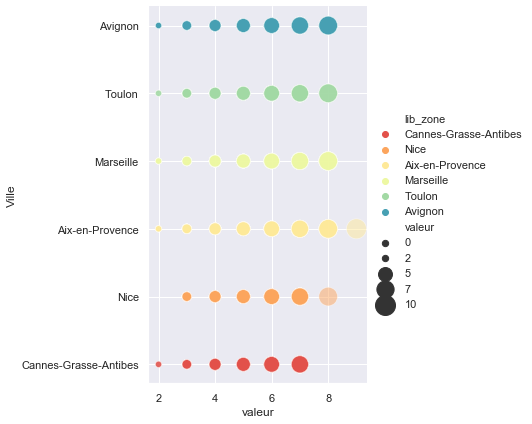

In [13]:
donneesVilles = data[["valeur", "lib_zone"]]
g = seaborn.relplot(
    x="valeur", 
    y="lib_zone", 
    hue="lib_zone", 
    size="valeur",
    sizes=(40, 400), 
    alpha=.5, 
    palette="Spectral",
    height=6, 
    data=donneesVilles)
g.set_axis_labels("valeur", "Ville");